In [1]:
# importing pandas to read CVS files and look at the data in table form
import pandas as pd
# added the encoding='latin-1' because sometimes CSV files have special characters and this helps them load correctly.

df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
df.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
df = df.dropna(subset=['released_month', 'streams'])
# dropping any rows that are missing the month or the streams
df['released_month'] = df['released_month'].astype(int)
# month column was stored as a float, so I'm converting it to an integer
def month_to_season(m):
    if m in [12, 1, 2]:
        return 'Winter'
    elif m in [3, 4, 5]:
        return 'Spring'
    elif m in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
# This function takes a month number (1–12) and returns the season
    

df['season'] = df['released_month'].apply(month_to_season)
# each song gets labeled with a season based on its release month

In [ ]:
print(df.columns)
# checking columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'season'],
      dtype='object')


In [ ]:
#telling pandas that the columns are separated by semicolons instead of commas
df = pd.read_csv('spotify-2023.csv', encoding='latin-1', sep=';')
#checking number of columns and names
len(df.columns), df.columns
#checking correct loading
df.head()

,"track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%"
0,"Seven (feat. Latto) (Explicit Ver.),""Latto, Ju..."
1,"LALA,Myke Towers,1,2023,3,23,1474,48,133716286..."
2,"vampire,Olivia Rodrigo,1,2023,6,30,1397,113,14..."
3,"Cruel Summer,Taylor Swift,1,2019,8,23,7858,100..."
4,"WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,3..."


In [ ]:
import matplotlib.pyplot as plt
#importing matplotlib to make charts and visualizations

In [8]:
df.columns.tolist()

['track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%']

In [9]:
df = pd.read_csv('spotify-2023.csv', sep=',', encoding='latin-1')
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [10]:
df['streams'].head()

0    141381703
1    133716286
2    140003974
3    800840817
4    303236322
Name: streams, dtype: object

In [11]:
df[df['streams'].str.contains('[A-Za-z]', na=False)].head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [12]:
df['streams'].head(20)

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
5      183706234
6      725980112
7       58149378
8       95217315
9      553634067
10     505671438
11      58255150
12    1316855716
13     387570742
14    2513188493
15    1163093654
16     496795686
17      30546883
18     335222234
19     363369738
Name: streams, dtype: object

In [13]:
df['streams'] = df['streams'].str.strip().str.replace(',', '', regex=False)

In [14]:
pd.to_numeric(df['streams'], errors='coerce')


0      141381703.0
1      133716286.0
2      140003974.0
3      800840817.0
4      303236322.0
          ...     
948     91473363.0
949    121871870.0
950     73513683.0
951    133895612.0
952     96007391.0
Name: streams, Length: 953, dtype: float64

In [15]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['streams'].isna().sum()
df[df['streams'].isna()]


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,NaN,16,...,110,A,Major,53,75,69,7,0,17,3


In [16]:
monthly_avg = df.groupby('released_month')['streams'].mean()
monthly_avg

released_month
1     7.275061e+08
2     3.531535e+08
3     4.770526e+08
4     4.041460e+08
5     4.156691e+08
6     4.100447e+08
7     4.821765e+08
8     6.312657e+08
9     7.346444e+08
10    5.889024e+08
11    5.525923e+08
12    3.695734e+08
Name: streams, dtype: float64

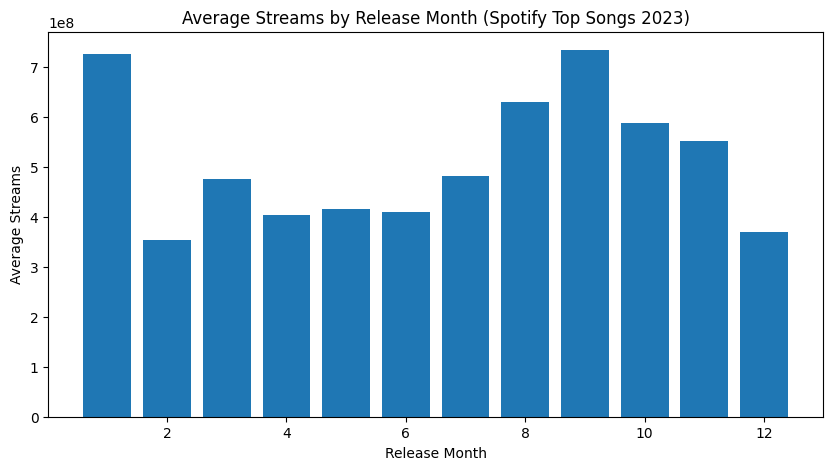

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(monthly_avg.index, monthly_avg.values)
plt.xlabel("Release Month")
plt.ylabel("Average Streams")
plt.title("Average Streams by Release Month (Spotify Top Songs 2023)")
plt.show()


In [18]:
df[['released_month', 'streams']].corr()

,released_month,streams
released_month,1.000000,-0.024938
streams,-0.024938,1.000000


In [19]:
import calendar
df['month_name'] = df['released_month'].apply(lambda x: calendar.month_name[int(x)])

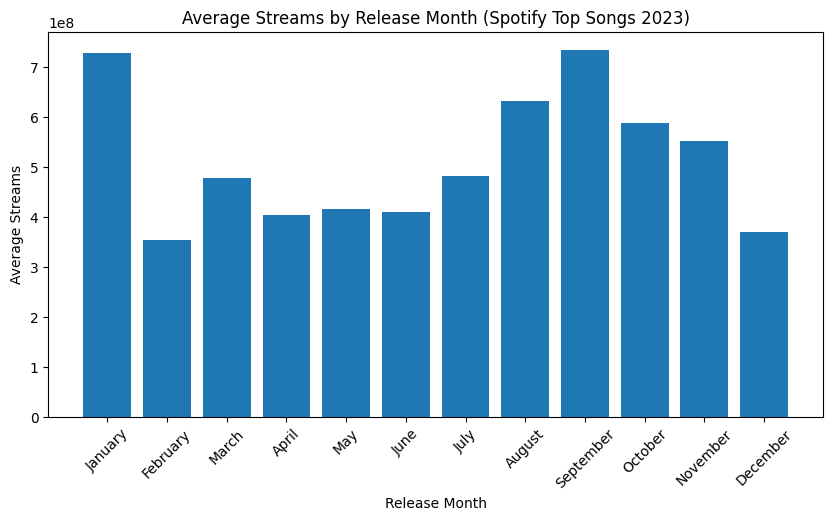

In [20]:
monthly_avg = df.groupby('month_name')['streams'].mean()
monthly_avg = monthly_avg.reindex(calendar.month_name[1:])  # Order Jan–Dec

plt.figure(figsize=(10,5))
plt.bar(monthly_avg.index, monthly_avg.values)
plt.xticks(rotation=45)
plt.xlabel("Release Month")
plt.ylabel("Average Streams")
plt.title("Average Streams by Release Month (Spotify Top Songs 2023)")
plt.show()